1) Importe o arquivo ‘base_temp.xlsx’ para um dataframe pandas.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from matplotlib.patches import Circle

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_abs = '/content/drive/My Drive'
path_base = '/Curso de Python/Bases/base_temp.xlsx'

In [3]:
df = pd.read_excel(path_abs+path_base)
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,id_domicilio,zona,municipio,num_moradores,comodos,banheiros,som,tv,dvd,geladeira,...,mes_malaria,dia_malaria,internacao,grupo_data,multiplos_beneficios,multiplos_tratamentos,configuracao_familiar,trimestre_malaria,uf,faixa_etaria
0,1,2,1,9,3,2,0,0,0,1,...,1.0,NaN,1.0,1,0.0,NaN,5,1.0,11,2.0
1,2,2,1,6,5,1,0,1,0,1,...,1.0,NaN,0.0,1,0.0,NaN,5,1.0,11,1.0
2,3,2,1,7,4,1,0,1,0,1,...,2.0,NaN,0.0,2,NaN,0.0,5,1.0,11,2.0
3,4,2,1,3,5,2,1,1,1,1,...,12.0,12.0,0.0,1,1.0,1.0,5,4.0,11,2.0
4,5,2,1,4,4,2,0,1,0,0,...,8.0,20.0,0.0,1,0.0,0.0,3,3.0,11,2.0


2) Faça um histograma da quantidade de casos de malária ao longo da vida (‘casos_malaria’).

Text(0.5, 1.0, 'Casos de malária ao longo da vida (geral)')

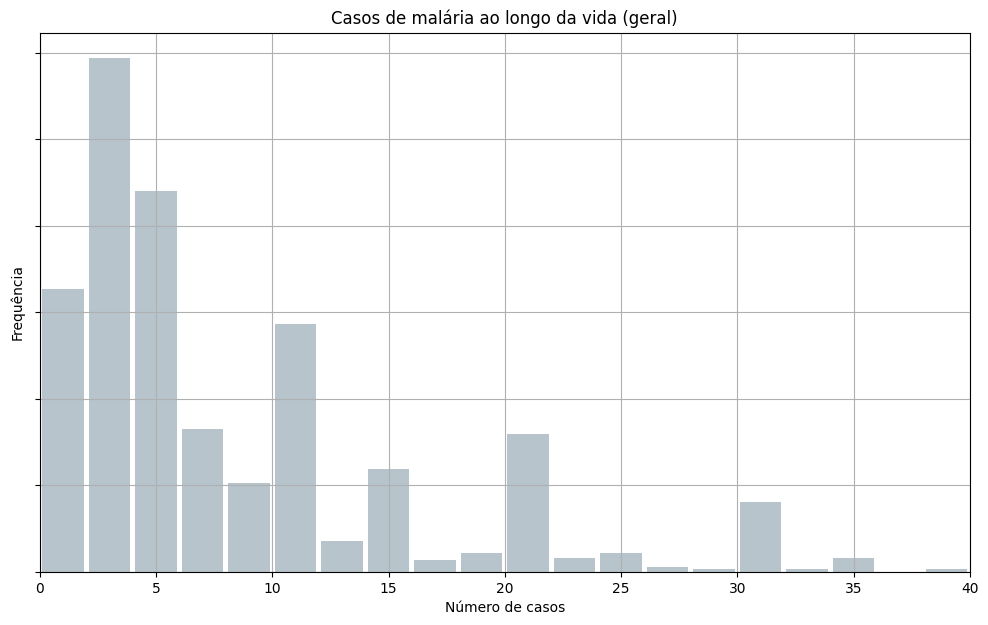

In [4]:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (12, 7)
                       )

valores = [0]*151
for i in range(1,151):
    valores[i] = valores[i-1]+2

df['casos_malaria'].plot.hist(grid=True, density = True, bins=valores, rwidth=0.9, alpha = 0.45, ax = axs,
                color='#607c8e')
axs.set_xlim(0, 40)
axs.set_yticklabels([])
axs.set_ylabel('Frequência')
axs.set_xlabel('Número de casos')

axs.set_title("Casos de malária ao longo da vida (geral)")

3) Faça um gráfico de barras horizontal com o grau de escolaridade do respondente (‘escol_respond’).

Text(0.5, 1.0, 'Grau de escolaridade do respondente')

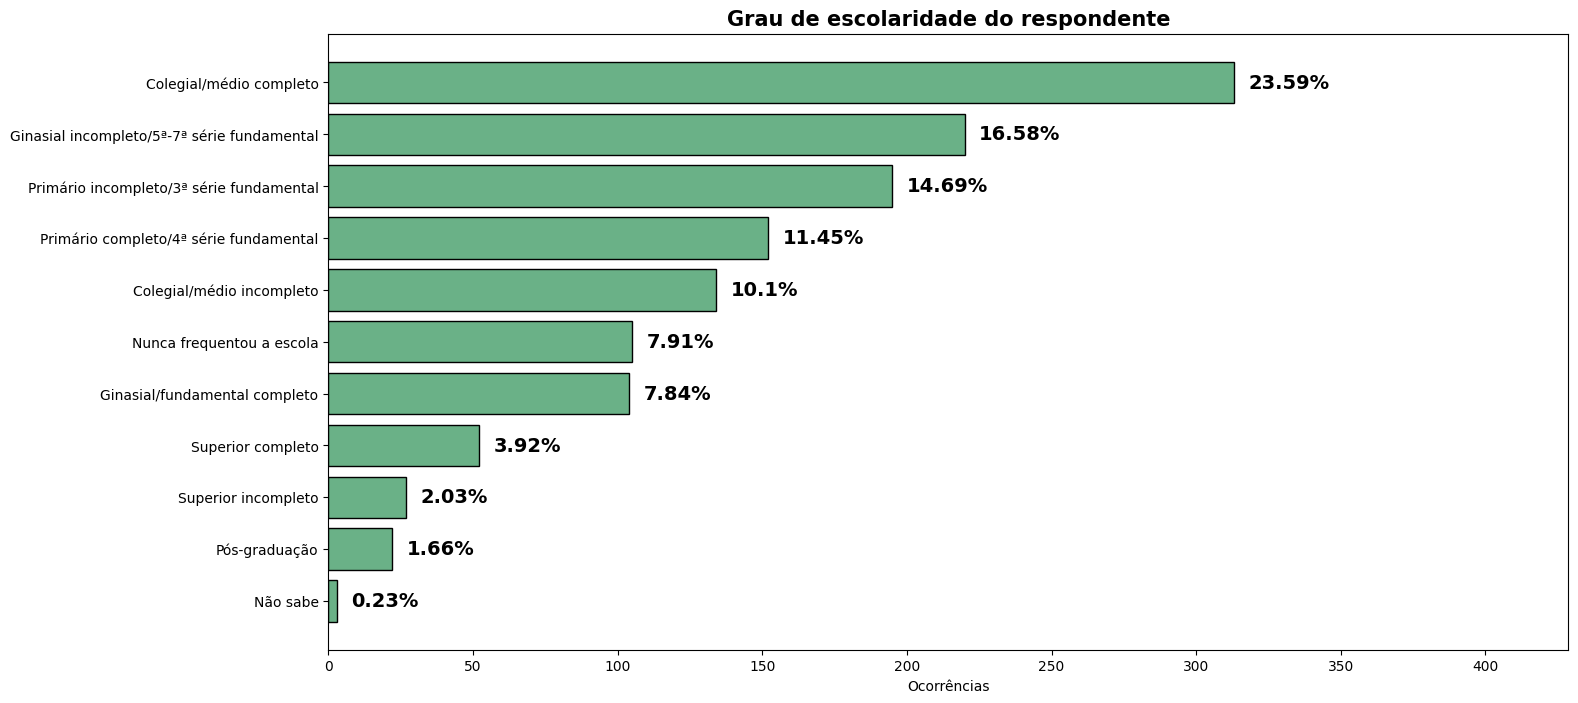

In [6]:
df['escol_respond'] = df['escol_respond'].fillna(11)
esc = df['escol_respond'].value_counts()

labels = ['Não sabe', 'Pós-graduação','Superior incompleto','Superior completo','Ginasial/fundamental completo','Nunca frequentou a escola', 'Colegial/médio incompleto','Primário completo/4ª série fundamental','Primário incompleto/3ª série fundamental', 'Ginasial incompleto/5ª-7ª série fundamental','Colegial/médio completo']

valores = (esc[1], esc[2], esc[3], esc[4], esc[5], esc[6], esc[7], esc[8], esc[9], esc[10], esc[11])

fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (16, 8)
                       )

axs.barh(labels, sorted(valores, reverse = False), edgecolor ="black", color = "#6AB187")
_, xmax = plt.xlim()
plt.xlim(0, xmax+100)
for i, v in enumerate(sorted(valores, reverse = False)):
    axs.text(v + 5, i, str(((v/esc.sum())*100).round(2))+"%", color='black', fontweight='bold', fontsize=14, ha='left', va='center')

plt.xlabel("Ocorrências")
plt.title("Grau de escolaridade do respondente", fontsize=15, fontweight="bold")

4) Faça um gráfico com dois subplots de gráficos donut sobre gado e propriedades rurais (‘gado’ e ‘terra’). 1 – Possui, 0 – Não possui.

In [8]:
def grafico_pizza(valores, labels, pct, ax):
    if len(labels) == 2:
        cores = ['#BC3100', "#CED2CC"]
    elif len(labels) ==3:
        cores = ['#BC3100', "#CED2CC", "#6AB187"]
    elif len(labels) == 4:
        cores = ['#BC3100', "#CED2CC", "#6AB187", "#488A99"]
    elif len(labels) == 5:
        cores = ['#BC3100', "#CED2CC", "#6AB187", "#488A99", "#4CB5F5"]
    elif len(labels) == 6:
        cores = ['#BC3100', "#CED2CC", "#6AB187", "#488A99", "#4CB5F5", "#23282D"]
    elif len(labels) == 7:
        cores = ['#BC3100', "#CED2CC", "#6AB187", "#488A99", "#4CB5F5", "#23282D", "#D32D41"]
    else:
        cores = ['#BC3100', "#CED2CC", "#6AB187", "#488A99", "#4CB5F5", "#23282D", "#D32D41", "#DBAE58"]
    ax.pie(valores, colors=cores, labels=labels,
        autopct=pct, pctdistance=0.85,
        explode=(0.05,)*len(labels))
    centro_circulo = Circle((0, 0), 0.70, fc='white')
    ax.add_patch(centro_circulo)


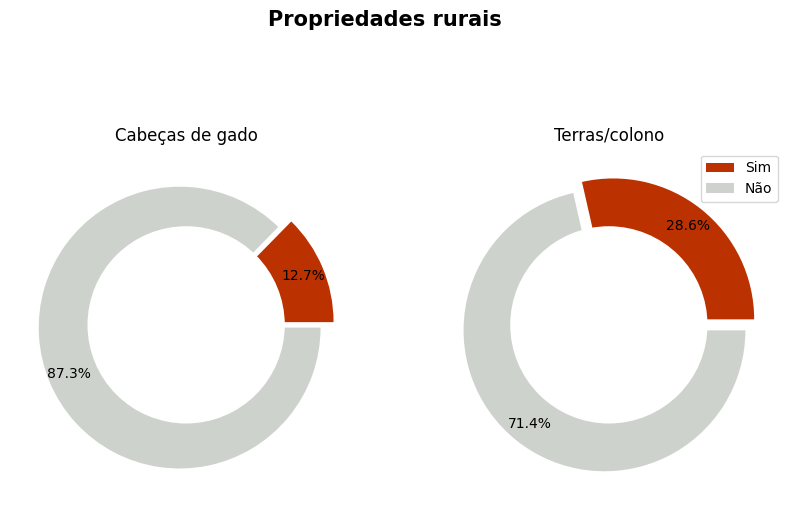

In [13]:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 2,
                        figsize= (10, 7)
                       )


gado = df['gado'].value_counts()
valores = (gado[1], gado[0])
labels = ['', '']
grafico_pizza(valores, labels,'%1.1f%%',ax=axs[0])
axs[0].set_title('Cabeças de gado')

terra = df['terra'].value_counts()
valores = (terra[1], terra[0])
labels = ['', '']
grafico_pizza(valores, labels,'%1.1f%%',ax=axs[1])
axs[1].set_title('Terras/colono')
axs[1].legend(labels = ['Sim', 'Não'], loc='upper right')
fig.suptitle("Propriedades rurais", fontsize=15, fontweight="bold")
fig.subplots_adjust(top=0.95)

5) Faça um boxplot horizontal com a duração do caso de malária em função do grupo de data (‘dias_malaria’ e ‘grupo_data’: 1 – jan/2019 – jan/2022, 2-fev-mar/2022).

Text(0.5, 0, 'Dias')

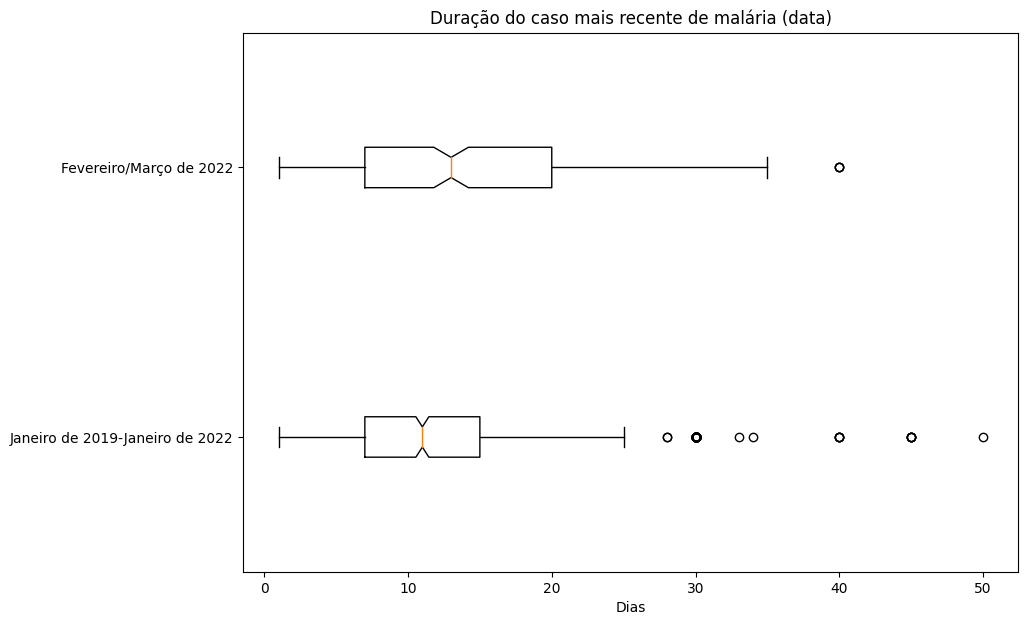

In [12]:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 1,
                        figsize= (10, 7)
                       )

perc1 = df['dias_malaria'][df.grupo_data == 1].quantile(0.95)
perc2 = df['dias_malaria'][df.grupo_data == 2].quantile(0.95)

g1 = df[(df.grupo_data == 1)&(df.dias_malaria <= perc1)]['dias_malaria'].dropna()
g2 = df[(df.grupo_data == 2)&(df.dias_malaria <= perc2)]['dias_malaria'].dropna()
data = [g1,g2]
labels = ['Janeiro de 2019-Janeiro de 2022', 'Fevereiro/Março de 2022']

bp = axs.boxplot(data, patch_artist = False,
            notch ='True', vert = 0)
axs.set_yticklabels(labels)

axs.set_title("Duração do caso mais recente de malária (data)")
axs.set_xlabel('Dias')